CKD Prediction System - Python - CS@KKU Term Project By BossBoxing,BillyForce

Description : Thai

github : 
https://github.com/BossBoxing/TermProjectKKU_CKD_Prediction_Web_Application

ขั้นตอนที่ 1 Exploratory Data / Clean Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('./kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


จัดการชื่อคอลัมน์ใหม่ โดยจากเดิม เป็นชื่อย่อ เป็นชื่อที่สามารถเข้าใจได้ง่าย

In [3]:
df.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [4]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


จะพบว่า มีคอลัมน์ที่เป็นตัวเลข แต่มี type เป็น object ดังนั้นจะทำการแปลง (object -> numerical)

In [5]:
## แปลงคอลัมน์ตัวเลขที่เป็น object ให้เป็น numeric
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'],errors="coerce")
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'],errors="coerce")
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'],errors="coerce")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

ต่อไปจะทำการแยกข้อมูลออกด้วย ตัวเลข

In [7]:
## extracting numeric and categorical data 

num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [8]:
num_cols

['id',
 'age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

ต่อไปจะทำการตรวจการซ้ำกันของข้อมูลของ categorical data เพื่อหา unique data

In [9]:
# หา unique ของแต่ละขอลัมน์
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



จากการค้นหา unique data จะพบว่า ยังมีบางข้อมูลที่ตรงแก้ไข ให้ถูกต้อง เช่น ckd\t , \tno , \tyes

In [10]:
df['diabetes_mellitus'].replace(to_replace={'\tno' :'no' ,'\tyes' :'yes' , ' yes' :'yes'},inplace=True)
df['coronary_artery_disease'].replace(to_replace='\tno' , value='no',inplace=True)
df['class'].replace(to_replace="ckd\t" ,value="ckd",inplace=True) 

In [11]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



ทำการ plot ภาพเพื่อดูการกระจายของข้อมูล

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

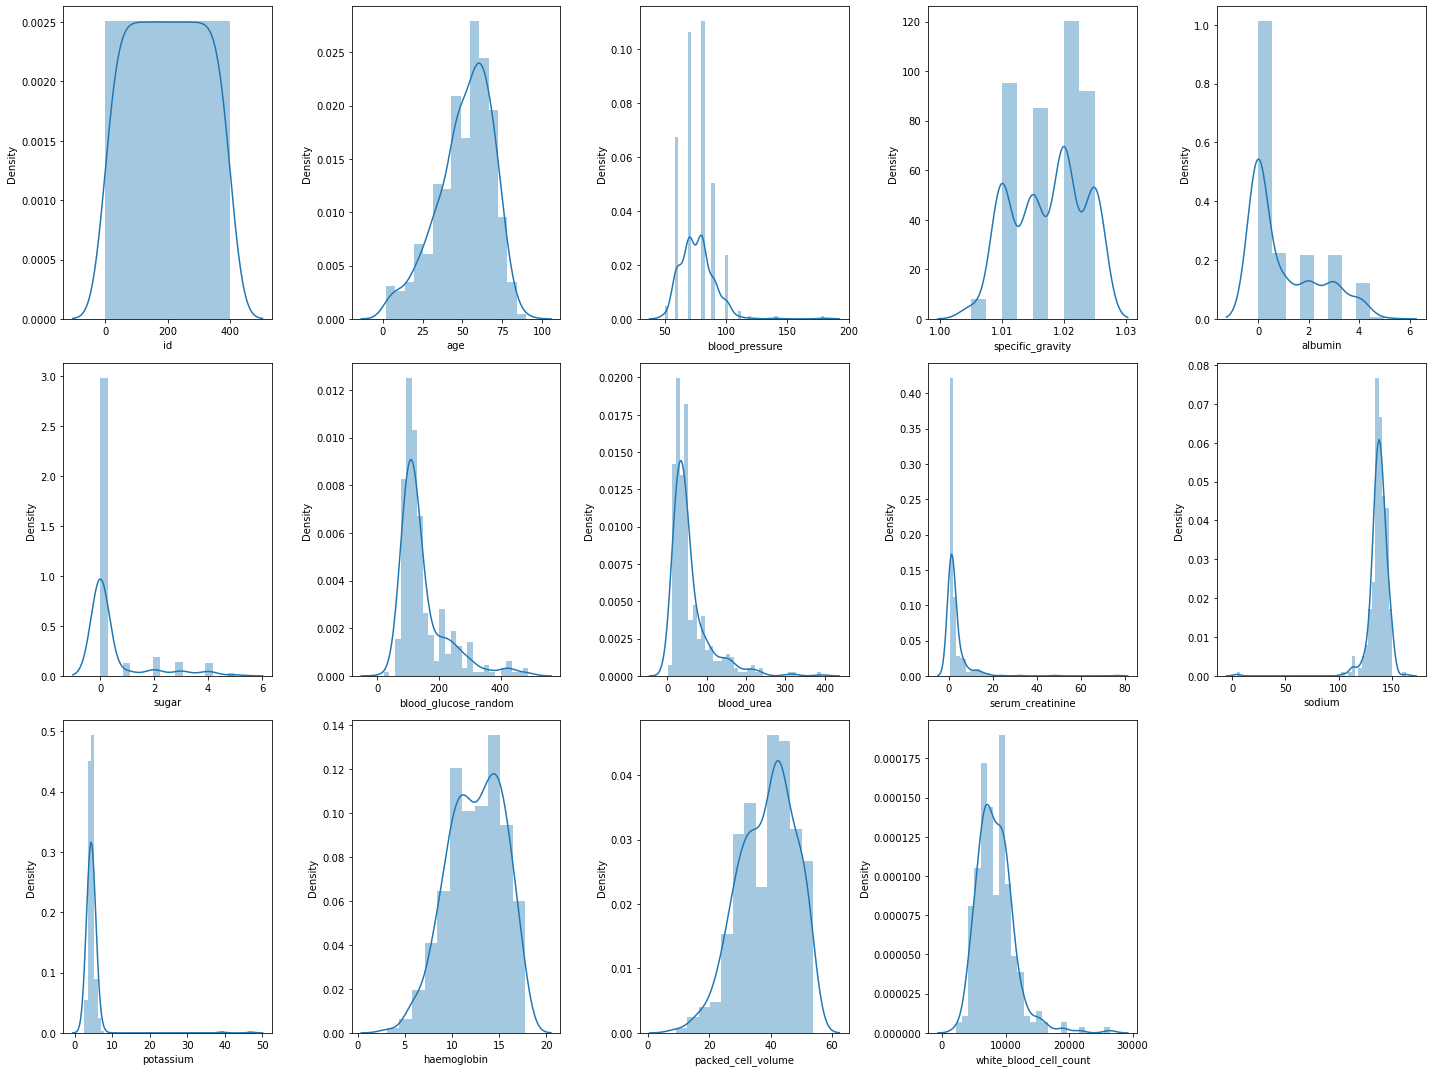

In [12]:
# plot ข้อมูลออกมาดูการกระจายของข้อมูล

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [13]:
# จัดการข้อมูลที่มันเบ้ / หรือจัดการ outlier
def handel_outlier(col):
    df[col] =np.log1p(df[col])

handel_outlier('blood_urea')
handel_outlier('sodium')
handel_outlier('potassium')
handel_outlier('serum_creatinine')
handel_outlier('sugar')

distplot ดูการกระจายข้อมูลอีกครั้ง

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

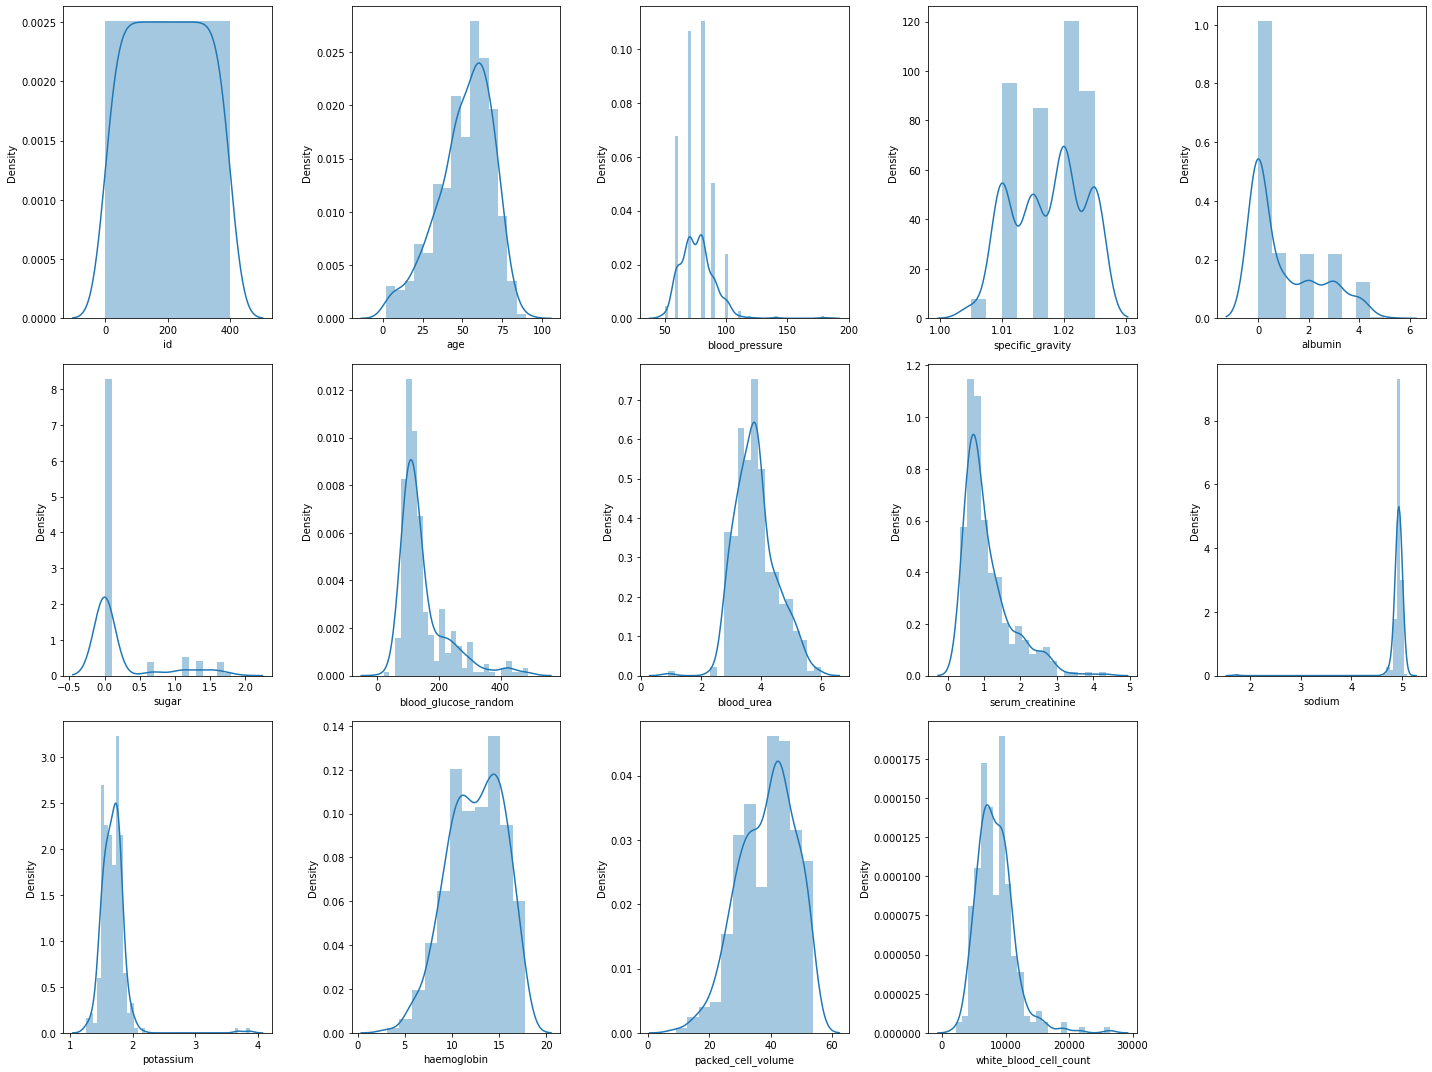

In [14]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

จะเห็นว่า ข้อมูลยังมีส่วนขาดหายไป เนื่องจากต้องหา missing value

In [15]:
df.isna().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [16]:
# random sampling สำหรับค่าที่สูงกว่า null values
# mean/mode sampling สำหรับค่าที่ต่ำกว่า null values
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature] =random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] =df[feature].fillna(mode)

จัดการกับ missing value โดยจะมี 2 วิธี random sampling,mean/mode sampling

In [17]:
###filling num columns null values uysing rando sampling method

for col in num_cols:
    random_value_imputation(col)

In [18]:
df[num_cols].isnull().sum()

id                        0
age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

ใน categorical cols

In [19]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [20]:
# random_value_imputation('red_blood_cells')
# random_value_imputation('pus_cell')
for col in cat_cols:
    impute_mode(col)

In [21]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

ต่อไปจะทำการจัดการข้อมูลที่เป็น text ให้อยู่ในรูปแบบตัวเลข true false -> 0,1 เช่น yes:1 , no:0  / หรือแปลงเป็น (boolean)

In [22]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.000000,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.000000,normal,normal,notpresent,notpresent,...,38.0,6000.0,5.5,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,1.386294,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.5,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.000000,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.000000,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [23]:
from sklearn.preprocessing  import LabelEncoder

encode = LabelEncoder()

for col in cat_cols:
    df[col]=encode.fit_transform(df[col])

In [24]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.000000,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.000000,1,1,0,0,...,38.0,6000.0,5.5,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,1.386294,1,1,0,0,...,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.000000,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.000000,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


ขั้นตอน 2 Train Model

เริ่มจากการแบ่งข้อมูล X,Y

In [25]:
# splitting the data
X = df.drop(columns ='class' , axis=1)
Y = df['class']

In [26]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.000000,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.000000,1,1,0,0,...,38.0,6000.0,5.5,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,1.386294,1,1,0,0,...,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.000000,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.000000,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [27]:
X.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,0,48.0,80.0,1.020,1.0,0.000000,1,1,0,0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.000000,1,1,0,0,...,11.3,38.0,6000.0,5.5,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,1.386294,1,1,0,0,...,9.6,31.0,7500.0,4.5,0,1,0,1,0,1
3,3,48.0,70.0,1.005,4.0,0.000000,1,0,1,0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.000000,1,1,0,0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


In [28]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int32

In [29]:
##model selection 
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

feture_el_model  = SelectFromModel(Lasso(alpha=0.005 ,random_state =42))

feture_el_model.fit(X,Y)
feture_el_model.get_support()

array([ True,  True,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
        True,  True,  True, False, False, False, False])

In [30]:
cols= X.columns
selected_feature = cols[feture_el_model.get_support()]

In [31]:
print('total_features {}' .format(X.shape[1]))
print('total_features {}' .format(len(selected_feature)))
print(selected_feature)

total_features 25
total_features 11
Index(['id', 'age', 'blood_pressure', 'albumin', 'blood_glucose_random',
       'serum_creatinine', 'haemoglobin', 'packed_cell_volume',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus'],
      dtype='object')


In [32]:
X= X[selected_feature]

In [33]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=.3,random_state=42)

Building ML Models

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score

models = []
models.append(('LogisticRegression',LogisticRegression(solver='liblinear')))
models.append(('Naive bayes' ,GaussianNB()))
models.append(('RandomForest' ,RandomForestClassifier()))
models.append(('Decision Tree ' ,DecisionTreeClassifier()))
models.append (('KNN' ,KNeighborsClassifier()))

In [35]:
for name , model in models :
    print(name)
    model.fit(x_train , y_train)
    
    prediction = model.predict(x_test)
    
    from sklearn.metrics import confusion_matrix
    
    print(confusion_matrix(prediction,y_test))
    print('\n')
    print(accuracy_score(prediction,y_test))
    print('\n')

LogisticRegression
[[76  0]
 [ 0 44]]


1.0


Naive bayes
[[73  1]
 [ 3 43]]


0.9666666666666667


RandomForest
[[76  0]
 [ 0 44]]


1.0


Decision Tree 
[[76  1]
 [ 0 43]]


0.9916666666666667


KNN
[[74  0]
 [ 2 44]]


0.9833333333333333




ขั้นตอนที่ 3 Saving the model

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
print("Decision Tree")
model.fit(x_train , y_train)
    
prediction = model.predict(x_test)
    
from sklearn.metrics import confusion_matrix
    
print(confusion_matrix(prediction,y_test))
print('\n')
print(accuracy_score(prediction,y_test))
print('\n')

import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

Decision Tree
[[76  1]
 [ 0 43]]


0.9916666666666667


